In [1]:
import numpy as np
import pandas as pd
import re,string    # re=regular expression, special character haru hatauna kaam lagxa
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  # sentence ma navaye pani meaning dine
from nltk.stem import PorterStemmer  # porterstremmer= root word find garxa, example: root word of dancing is dance
from sklearn.feature_extraction.text import TfidfVectorizer   
# vayeko sabai word lai number ma convert garera vector ma convert garna use hunxa
# each and every word lai token(number) ma convert garxa

from sklearn.pipeline import Pipeline  # algorithm apply kun kun process bata pass huna parxa
from sklearn.metrics import classification_report, confusion_matrix 
# confusion-matrix= model ley kati ko correctly classify gareko xa vanne thapauna help garxa

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2  
# selectKbest= k words line or select garera algorithm lagaune
# chi2= chi square test to check accuracy

import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline  # for designs

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
UsageError: unrecognized arguments: # for designs


In [2]:
df = pd.read_csv('twitter_training.csv', encoding = 'latin1',usecols=['Reaction','Review'])
df = df.sample(frac = 1)
sdf=df.sort_index()
sdf

,Reaction,Review
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [3]:
sdf.isnull().sum().values.sum()

686

In [4]:
sdf=sdf.dropna()

In [5]:
sdf.isna().sum()

Reaction    0
Review      0
dtype: int64

In [6]:
print(set(sdf['Reaction']))
len(set(sdf['Reaction']))


{'Neutral', 'Positive', 'Negative', 'Irrelevant'}


4

In [7]:
sdf.groupby('Reaction').Reaction.count()

Reaction
Irrelevant    12875
Negative      22358
Neutral       18108
Positive      20655
Name: Reaction, dtype: int64

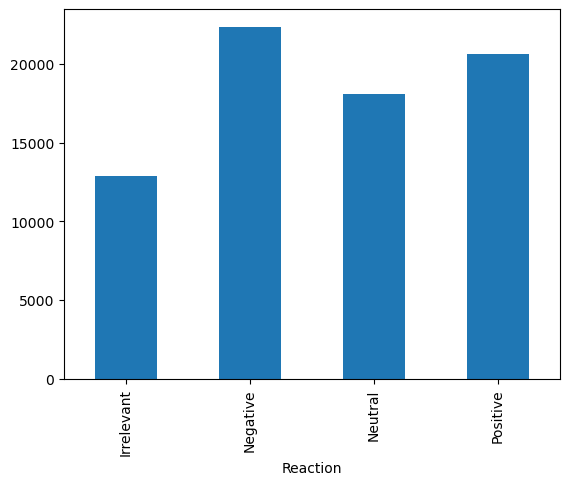

In [8]:
sdf.groupby('Reaction').Reaction.count().plot.bar()
plt.show()

In [9]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
sdf['Review'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in sdf['Review']]
sdf['Review']= list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), sdf['Review']))

C:\Users\Dell\AppData\Local\Temp\ipykernel_15804\139065922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Review'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in sdf['Review']]
C:\Users\Dell\AppData\Local\Temp\ipykernel_15804\139065922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Review']= list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), sdf['Review']))


In [11]:
sdf

,Reaction,Review
0,Positive,im getting borderlands murder
1,Positive,coming borders kill
2,Positive,im getting borderlands kill
3,Positive,im coming borderlands murder
4,Positive,im getting borderlands murder
...,...,...
74677,Positive,realized windows partition mac like years behi...
74678,Positive,realized mac window partition years behind nvi...
74679,Positive,realized windows partition mac years behind nv...
74680,Positive,realized windows partition mac like years behi...


In [32]:
sdf.to_csv('cleaned_twitter_data.csv')

In [12]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer() 
X = sdf['Review'] #indepedent 
Y = sdf['Reaction'] #dependent

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15) 

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer), 
                     ('chi',  SelectKBest(chi2, k=2000)), 
                     ('clf', LogisticRegression(random_state=1,max_iter=1000))]) 


model = pipeline.fit(X_train, Y_train)

In [13]:
X_test

4833                             thanks correction emailed
53892    shit coming like call duty zombies mf said sec...
32157                          grinding twitch tv krrnster
49350          fifa makes barca black gold kit look boring
66727    johnson johnson temporarily halted covid vacci...
                               ...                        
39900    ban battlefield player ohnothelag occurred see...
71662            even see problem breakpoint simply loving
59878    back later cause know upset sad evan vlad some...
44777    verizon restaurant college phone plan means re...
50142    caught presser late someone please assist chai...
Name: Review, Length: 11100, dtype: object

In [14]:
from sklearn.metrics import accuracy_score
predict_review_cat = model.predict(X_test) 
print(accuracy_score(Y_test,predict_review_cat))

0.6273873873873874


In [15]:
review = input("Enter review = ")
review_data = {'predict_review':[review]} 
review_data_df = pd.DataFrame(review_data) 
predict_review_cat = model.predict(review_data_df['predict_review'])
print("Predicted review reaction = ",predict_review_cat[0])

Enter review = im getting borderlands murder
Predicted review reaction =  Positive


In [16]:
from sklearn.metrics import classification_report, confusion_matrix 
ytest = np.array(Y_test)
print(classification_report(ytest,model.predict(X_test))) 
print(confusion_matrix(model.predict(X_test),Y_test))

              precision    recall  f1-score   support

  Irrelevant       0.67      0.44      0.53      1964
    Negative       0.66      0.73      0.69      3322
     Neutral       0.55      0.59      0.57      2689
    Positive       0.63      0.67      0.65      3125

    accuracy                           0.63     11100
   macro avg       0.63      0.61      0.61     11100
weighted avg       0.63      0.63      0.62     11100

[[ 868  112  171  140]
 [ 325 2423  506  401]
 [ 339  443 1588  499]
 [ 432  344  424 2085]]


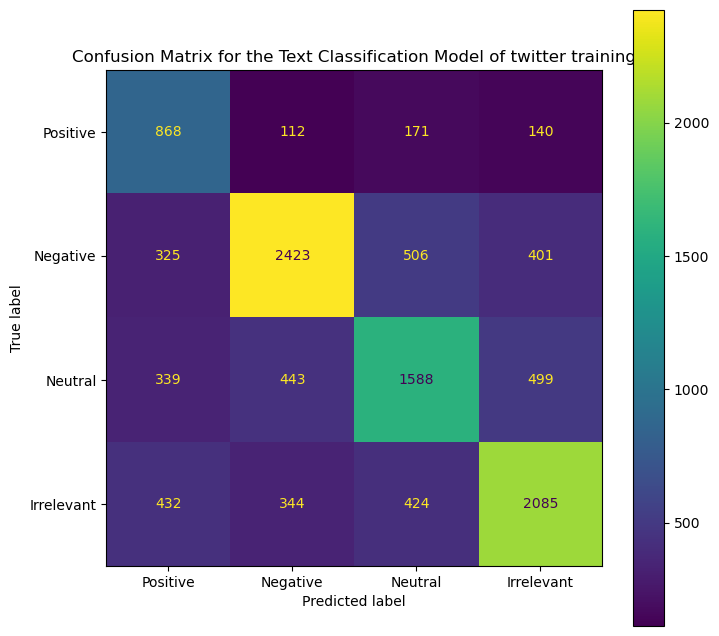

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),Y_test)
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['Positive','Negative','Neutral','Irrelevant']
display = ConfusionMatrixDisplay(cm, display_labels=class_names)
ax.set(title='Confusion Matrix for the Text Classification Model of twitter training')
display.plot(ax=ax);

# Observation
Hence, logistic regression ml algorithm is not really suitable for this dataset since there is only 62.5% accuracy